In [162]:
import os
os.chdir(r'C:\Users\cast6\OneDrive\Desktop\Abortion')
import pandas as pd
import numpy as np
import PoliticalAff

import matplotlib.pyplot as plt

from statistics import stdev

# Questions
1.Are abortions divided by political afflicaiton? 
2.What age groups are more likley to get one?
3.Does the availablity increase the chances?
4.Are abortions on a rise?


# Approach

Political affliation will be based on electrol votes of a state. For example a state like California would be considered blue while a state like Oklahoma will be consider red.

5 variables that will be looked at.
1.Total Abortion
2.Political Affliation
3.Abortion Year
4.Female Age
5.Clinics Avaliable




In [7]:
#First Getting the total abortions invoked with the most recent data


abortion_state = pd.read_csv("NationalAndStatePregnancy_PublicUse.csv")


In [8]:
abortion_state.columns

Index(['state', 'year', 'pregnancyratelt15', 'pregnancyrate1517',
       'pregnancyrate1819', 'pregnancyrate1519', 'pregnancyratelt20',
       'pregnancyrate2024', 'pregnancyrate2529', 'pregnancyrate3034',
       ...
       'abortionstotal', 'birthstotal', 'pregnancyratetotal', 'birthratetotal',
       'abortionratetotal', 'abortionratiototal', 'miscarriagestotal',
       'pregnanciestotal', 'notes', 'versiondate'],
      dtype='object', length=103)

In [9]:
#abortion_total.sort_index()

In [10]:
#Getting the most recent year

year07_abortionDf =  abortion_state[abortion_state.year == 2017]



In [11]:
year07_abortionDf.state.count()

52

In [12]:
#Making a data frame with total abortion numbers

state_total_df = pd.DataFrame({'state':year07_abortionDf.state,
                              'TotalAbortions':year07_abortionDf.abortionstotal})





In [13]:
state_total_df.head()

,state,TotalAbortions
16,AL,7660
33,AK,1420
50,AZ,13270
67,AR,3710
84,CA,131380


In [14]:
#removing united states skew data an irrelivant to state mean
state_total_df.drop(state_total_df.index[state_total_df['state'] == 'US'], inplace = True)

In [15]:
print(state_total_df)


    state  TotalAbortions
16     AL            7660
33     AK            1420
50     AZ           13270
67     AR            3710
84     CA          131380
101    CO           11100
118    CT           11950
135    DE            2770
152    DC            3930
169    FL           68640
186    GA           32520
203    HI            3220
220    ID            1790
237    IL           37770
254    IN           10270
271    IA            3650
288    KS            3520
305    KY            4780
322    LA            9280
339    ME            2050
356    MD           26940
373    MA           18880
390    MI           26130
407    MN           10100
424    MS            4930
441    MO            9690
458    MT            1510
475    NE            2250
492    NV            9620
509    NH            2330
526    NJ           47010
543    NM            3830
560    NY          103060
577    NC           25060
594    ND             970
611    OH           20560
628    OK            4780
645    OR   

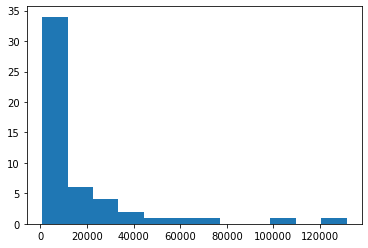

In [16]:


plt.hist(state_total_df.TotalAbortions,bins = 12  );


In [17]:
#tail leans to the right, showing that most abortions are between 0 - 20k.

In [18]:
#Getting the most recent year



#Getting the mean of abboritions performed 
mean = state_total_df.TotalAbortions.mean()

median = state_total_df.TotalAbortions.median()
mode = state_total_df.TotalAbortions.mode()

standardDev = stdev(state_total_df.TotalAbortions)


print("Mean" ,mean)
print("Median", median)
print("Mode" ,mode)
print("SD" ,standardDev)


Mean 16879.41176470588
Median 8950.0
Mode 0    4780
dtype: int64
SD 25377.996249646243


In [19]:
#Getting Political Standing of every state.
#Defining what political affliation is by state

political_aff_state_df = pd.read_csv("Popular vote backend.csv")

In [20]:
#Theses values are not us states and need to be removed 
states_remove = ['Veterans Health','Republic of Palau','Puerto Rico','Northern Mariana Islands','Marshall Islands','Long Term Care','Indian Health Svc','Federated States of Micronesia','Bureau of Prisons','American Samoa','Dept of Defense','Guam','United States','Virgin Islands']

In [21]:
political_aff_state_df.head()

,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
0,U.S. Total,D,Yes,"81,282,916","74,223,369","2,891,441",51.30%,46.90%,1.80%,4.50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020995,"136,639,848"
1,15 Key Battlegrounds,NaN,NaN,"31,908,248","33,002,287","950,354",48.40%,50.10%,1.40%,-1.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036220,"56,209,173"
2,Non-Battlegrounds,NaN,NaN,"49,374,668","41,221,082","1,941,087",53.40%,44.50%,2.10%,8.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060978,"80,430,331"
3,15 Key Battlegrounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.40%,49.10%,1.60%,0.30%,...,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165"


In [22]:

political_aff_state_df.state

0               U.S. Total
1     15 Key Battlegrounds
2        Non-Battlegrounds
3     15 Key Battlegrounds
4                  Arizona
              ...         
56                 Vermont
57                Virginia
58              Washington
59           West Virginia
60                 Wyoming
Name: state, Length: 61, dtype: object

In [23]:
myList = ["U.S. Total","15 Key Battlegrounds","Non-Battlegrounds","Non-Battlegrounds","15 Key Battlegrounds","Maine 1st District" ,"Maine 2nd District","Nebraska 1st District","Nebraska 2nd District","Nebraska 3rd District"]
polticalResultsElection_df = political_aff_state_df.loc[~political_aff_state_df.state.isin(myList)]

polticalResultsElection_df.head()

,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stateid,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
4,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.40%,49.10%,1.60%,0.30%,...,AZ,11.0,2.0,2.0,4.0,205.0,374.0,NaN,-0.035456,"2,573,165"
5,Florida,R,Yes,"5,297,045","5,668,731","101,680",47.90%,51.20%,0.90%,-3.40%,...,FL,29.0,8.0,0.0,12.0,787.0,520.0,NaN,-0.011986,"9,420,039"
6,Georgia,D,Yes,"2,473,633","2,461,854","62,229",49.50%,49.30%,1.20%,0.20%,...,GA,16.0,7.0,1.0,13.0,734.0,419.0,NaN,-0.051313,"4,092,373"
7,Iowa,R,Yes,"759,061","897,672","34,138",44.90%,53.10%,2.00%,-8.20%,...,IA,6.0,5.0,4.0,19.0,536.0,223.0,NaN,-0.094068,"1,566,031"
9,Michigan,D,Yes,"2,804,040","2,649,852","85,410",50.60%,47.80%,1.50%,2.80%,...,MI,16.0,7.0,5.0,26.0,681.0,190.0,NaN,-0.002230,"4,799,284"


In [24]:
#state_total_df  ---- aboritions total
#polticalResultsElection ------- state political stadning
#Once removed we will be able to compare Rublican state verse democratic state with total abortion.

poli_state_total_merged = pd.concat([state_total_df.set_index("state") ,polticalResultsElection_df.set_index("stateid")] , axis=1, join='inner')


poli_state_total_merged.tail()

,TotalAbortions,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,...,vote_change,EV,X,Y,State_num,Center_X,Center_Y,Unnamed: 19,2016 Margin,Total 2016 Votes
VA,20290,Virginia,D,Yes,"2,413,568","1,962,430","84,526",54.10%,44.00%,1.90%,...,12.00%,13.0,8.0,3.0,51.0,809.0,299.0,NaN,0.053212,"3,982,752"
WA,17760,Washington,D,Yes,"2,369,612","1,584,651","133,368",58.00%,38.80%,3.30%,...,21.50%,12.0,1.0,5.0,53.0,128.0,58.0,NaN,0.157060,"3,365,644"
WV,2380,West Virginia,R,Yes,"235,984","545,382","13,286",29.70%,68.60%,1.70%,...,11.40%,5.0,7.0,3.0,54.0,765.0,284.0,NaN,-0.420727,"713,051"
WI,7540,Wisconsin,D,Yes,"1,630,866","1,610,184","56,991",49.40%,48.80%,1.70%,...,10.80%,10.0,6.0,6.0,55.0,601.0,169.0,NaN,-0.007643,"2,976,150"
WY,720,Wyoming,R,Yes,"73,491","193,559","9,715",26.60%,69.90%,3.50%,...,8.20%,3.0,3.0,4.0,56.0,306.0,187.0,NaN,-0.462953,"255,849"


In [25]:
#Removing extra columns now needed 

poli_state_total_merged.drop(['final','dem_votes','rep_votes','other_votes','dem_percent','rep_percent','other_percent','vote_change','EV','X','Y','State_num','Center_X','Center_Y','Unnamed: 19','2016 Margin','Total 2016 Votes','dem_this_margin','margin_shift'] , axis=1, inplace = True)

In [26]:
#R is "Rebublican"
#D is Democrate 


poli_state_total_merged.head()

,TotalAbortions,state,called
AL,7660,Alabama,R
AK,1420,Alaska,R
AZ,13270,Arizona,D
AR,3710,Arkansas,R
CA,131380,California,D


In [27]:
print(poli_state_total_merged)

    TotalAbortions                 state called
AL            7660               Alabama      R
AK            1420                Alaska      R
AZ           13270               Arizona      D
AR            3710              Arkansas      R
CA          131380            California      D
CO           11100              Colorado      D
CT           11950           Connecticut      D
DE            2770              Delaware      D
DC            3930  District of Columbia      D
FL           68640               Florida      R
GA           32520               Georgia      D
HI            3220                Hawaii      D
ID            1790                 Idaho      R
IL           37770              Illinois      D
IN           10270               Indiana      R
IA            3650                  Iowa      R
KS            3520                Kansas      R
KY            4780              Kentucky      R
LA            9280             Louisiana      R
ME            2050                 Maine

Text(0.5, 0, 'Political Party')

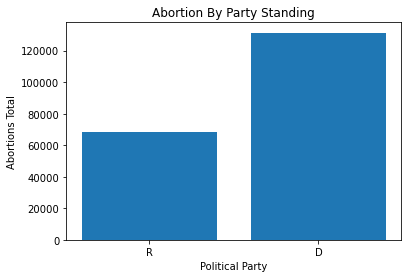

In [28]:
fig, ax = plt.subplots()



plt.bar(poli_state_total_merged.called ,poli_state_total_merged.TotalAbortions)
plt.title("Abortion By Party Standing")
plt.ylabel("Abortions Total")
plt.xlabel("Political Party")


In [29]:
#There are alot more demoratic states that are getting abortions. The total number is almost twice as much as republican states.

total_democrat_state = poli_state_total_merged[poli_state_total_merged.called == 'D']
total_republican_state = poli_state_total_merged[poli_state_total_merged.called == 'R']

print(total_democrat_state)


    TotalAbortions                 state called
AZ           13270               Arizona      D
CA          131380            California      D
CO           11100              Colorado      D
CT           11950           Connecticut      D
DE            2770              Delaware      D
DC            3930  District of Columbia      D
GA           32520               Georgia      D
HI            3220                Hawaii      D
IL           37770              Illinois      D
ME            2050                 Maine      D
MD           26940              Maryland      D
MA           18880         Massachusetts      D
MI           26130              Michigan      D
MN           10100             Minnesota      D
NV            9620                Nevada      D
NH            2330         New Hampshire      D
NJ           47010            New Jersey      D
NM            3830            New Mexico      D
NY          103060              New York      D
OR            8950                Oregon

In [30]:
print(poli_state_total_merged.state)

AL                 Alabama
AK                  Alaska
AZ                 Arizona
AR                Arkansas
CA              California
CO                Colorado
CT             Connecticut
DE                Delaware
DC    District of Columbia
FL                 Florida
GA                 Georgia
HI                  Hawaii
ID                   Idaho
IL                Illinois
IN                 Indiana
IA                    Iowa
KS                  Kansas
KY                Kentucky
LA               Louisiana
ME                   Maine
MD                Maryland
MA           Massachusetts
MI                Michigan
MN               Minnesota
MS             Mississippi
MO                Missouri
MT                 Montana
NE                Nebraska
NV                  Nevada
NH           New Hampshire
NJ              New Jersey
NM              New Mexico
NY                New York
NC          North Carolina
ND            North Dakota
OH                    Ohio
OK                Oklahoma
O

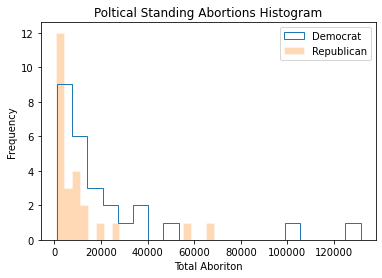

In [146]:
fix, ax = plt.subplots()
plt.title("Poltical Standing Abortions Histogram")
plt.ylabel("Frequency")
plt.xlabel("Total Aboriton")
ax.hist(total_democrat_state.TotalAbortions, bins=20, histtype="step" , label="Democrat")
ax.hist(total_republican_state.TotalAbortions, bins=20, histtype="stepfilled", label="Republican", alpha=0.3, edgecolor="w")
ax.legend()


In [32]:
print("Total Republican:", sum(total_republican_state.TotalAbortions))
print("Total Democrat:" ,sum(total_democrat_state.TotalAbortions) )
print("Total difference:" , sum(total_democrat_state.TotalAbortions) - sum(total_republican_state.TotalAbortions))



Total Republican: 270120
Total Democrat: 590730
Total difference: 320610


In [33]:
totalRMean = total_republican_state.TotalAbortions.mean()
totalRMedain = total_democrat_state.TotalAbortions.median()
totalRStd = stdev(total_democrat_state.TotalAbortions)



totalDMean = total_democrat_state.TotalAbortions.mean()
totalDMedain = total_democrat_state.TotalAbortions.median()
totalDstd = stdev(total_democrat_state.TotalAbortions)


print("Republican results:" , totalRMean, totalRMedain, totalRStd)
print("Democrat results:", totalDMean, totalDMedain, totalDstd)




Republican results: 10804.8 11525.0 30750.584837465347
Democrat results: 22720.384615384617 11525.0 30750.584837465347


In [34]:
clinic_availablity = pd.read_excel("numberOfClinics.xlsx")


In [35]:
clinic_availablity.head()

,State,No. of abortions,% of all U.S. abortions,"Change in the no. of abortion clinics, 2014-2017 b",% change in the no. of abortion clinics,Number_Of_Clinics,"% of counties without a known abortion provider, 2014"
0,Alabama,6110,0.7,0,0,5,91
1,Alaska,1260,0.1,1,33,4,79
2,Arizona,12400,1.4,-1,-11,8,80
3,Arkansas,3200,0.4,0,0,3,97
4,California,132680,15.4,9,6,161,24


In [36]:
state_political_stance = poli_state_total_merged.copy()
state_political_stance.head()



,TotalAbortions,state,called
AL,7660,Alabama,R
AK,1420,Alaska,R
AZ,13270,Arizona,D
AR,3710,Arkansas,R
CA,131380,California,D


In [37]:
clinic_state_total_merged = pd.concat([clinic_availablity.set_index("State") ,state_political_stance.set_index("state")] , axis=1, join='inner')


In [38]:
clinic_state_total_merged.head()

,No. of abortions,% of all U.S. abortions,"Change in the no. of abortion clinics, 2014-2017 b",% change in the no. of abortion clinics,Number_Of_Clinics,"% of counties without a known abortion provider, 2014",TotalAbortions,called
Alabama,6110,0.7,0,0,5,91,7660,R
Alaska,1260,0.1,1,33,4,79,1420,R
Arizona,12400,1.4,-1,-11,8,80,13270,D
Arkansas,3200,0.4,0,0,3,97,3710,R
California,132680,15.4,9,6,161,24,131380,D


In [39]:
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

clinic_state_total_merged.drop(['No. of abortions','% of all U.S. abortions','% change in the no. of abortion clinics','% of counties without a known abortion provider, 2014'], axis=1, inplace=True)

In [40]:
clinic_state_total_merged.head()

,"Change in the no. of abortion clinics, 2014-2017 b",Number_Of_Clinics,TotalAbortions,called
Alabama,0,5,7660,R
Alaska,1,4,1420,R
Arizona,-1,8,13270,D
Arkansas,0,3,3710,R
California,9,161,131380,D


In [41]:
total_clinics_democrat_state = clinic_state_total_merged[clinic_state_total_merged.called == 'D']
total_clinics_republican_state = clinic_state_total_merged[clinic_state_total_merged.called == 'R']


print(total_clinics_democrat_state.Number_Of_Clinics)

Arizona                   8
California              161
Colorado                 18
Connecticut              26
Delaware                  4
District of Columbia      4
Georgia                  15
Hawaii                    4
Illinois                 25
Maine                    16
Maryland                 25
Massachusetts            19
Michigan                 21
Minnesota                 7
Nevada                    7
New Hampshire             4
New Jersey               41
New Mexico                6
New York                113
Oregon                   16
Pennsylvania             18
Rhode Island              2
Vermont                   6
Virginia                 16
Washington               40
Wisconsin                 3
Name: Number_Of_Clinics, dtype: int64


In [42]:
#If the outliers are included Democratic states have alot more abortion avaiablity

print("Mean by Democratic State: ", total_clinics_democrat_state.Number_Of_Clinics.mean())
print("Mean by Rebulican State: ", total_clinics_republican_state.Number_Of_Clinics.mean())


Mean by Democratic State:  24.03846153846154
Mean by Rebulican State:  7.32


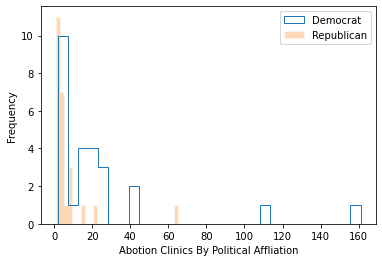

In [43]:
# ploting by political state affliation

fix, ax = plt.subplots()
plt.xlabel("Abotion Clinics By Political Affliation")
plt.ylabel("Frequency")
ax.hist(total_clinics_democrat_state.Number_Of_Clinics, bins=30, histtype="step" , label="Democrat")
ax.hist(total_clinics_republican_state.Number_Of_Clinics, bins=30, histtype="stepfilled", label="Republican", alpha=0.3, edgecolor="w")
ax.legend()



(array([38.,  8.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([  1.,  17.,  33.,  49.,  65.,  81.,  97., 113., 129., 145., 161.]),
 <BarContainer object of 10 artists>)

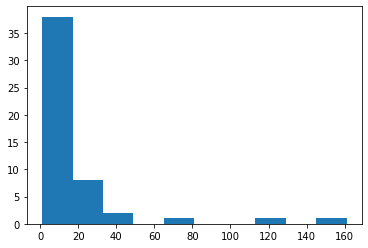

In [44]:
plt.hist(clinic_availablity.Number_Of_Clinics)

In [45]:
Abortion_Age_df = pd.read_csv("State Pregnancy-Birth-Abortion Rates.csv")

In [46]:
Abortion_Age_df.head()

,Year,State,Metric,Age_Range,"Events per 1,000 women"
0,1988,AL,Abortion Rate,15-17,24.0
1,1992,AL,Abortion Rate,15-17,19.1
2,1996,AL,Abortion Rate,15-17,12.5
3,2000,AL,Abortion Rate,15-17,9.3
4,2005,AL,Abortion Rate,15-17,7.0


In [47]:
#combinding total abotion total , to get a clearier picture of 
# adding a formula from events by women times 1000 to get an exact estimate
year16_abortionDf =  Abortion_Age_df[Abortion_Age_df.Year == 2016]

year16_abortionDf['Total_Abortions_Age'] = Abortion_Age_df['Events per 1,000 women'] * 1000

year16_abortionDf.head()






<ipython-input-47-098c669e01c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year16_abortionDf['Total_Abortions_Age'] = Abortion_Age_df['Events per 1,000 women'] * 1000


,Year,State,Metric,Age_Range,"Events per 1,000 women",Total_Abortions_Age
15,2016,AL,Abortion Rate,15-17,2.9,2900.0
31,2016,AK,Abortion Rate,15-17,4.5,4500.0
47,2016,AZ,Abortion Rate,15-17,2.2,2200.0
63,2016,AR,Abortion Rate,15-17,2.2,2200.0
79,2016,CA,Abortion Rate,15-17,5.3,5300.0


In [161]:


age_group = year16_abortionDf.groupby(['Age_Range','Total_Abortions_Age'])

age_group.last()


Year State          Metric  \
Age_Range Total_Abortions_Age                               
15-17     1000.0               2016    UT   Abortion Rate   
          1100.0               2016    SD   Abortion Rate   
          1300.0               2016    OK   Abortion Rate   
          1500.0               2016    ID   Abortion Rate   
          1600.0               2016    KS   Abortion Rate   
...                             ...   ...             ...   
Total     98200.0              2016    SD  Pregnancy Rate   
          100600.0             2016    ND  Pregnancy Rate   
          101300.0             2016    NY  Pregnancy Rate   
          102400.0             2016    AK  Pregnancy Rate   
          104300.0             2016    NJ  Pregnancy Rate   

                               Events per 1,000 women  
Age_Range Total_Abortions_Age                          
15-17     1000.0                                  1.0  
          1100.0                                  1.1  
          1300.0                                  1.3  
          1500.0                                  1.5  
          1600.0                                  1.6  
...                                               ...  
Total     98200.0                                98.2  
          100600.0                              100.6  
          101300.0                              101.3  
          102400.0                              102.4  
          104300.0                              104.3  

[1187 rows x 4 columns]

In [ ]:
#Take the most recent data and see if there is a trend between age goups that have a higer number of abortions


year16_abortionDf['Total_Abortions_Age'].hist(by=year16_abortionDf['Age Range'], bins=40 , figsize = (16,18))

In [49]:
abortion_by_year = Abortion_Age_df.copy()
abortion_by_year['TotalAbortions'] = abortion_by_year['Events per 1,000 women'] * 1000
abortion_by_year.head()




,Year,State,Metric,Age_Range,"Events per 1,000 women",TotalAbortions
0,1988,AL,Abortion Rate,15-17,24.0,24000.0
1,1992,AL,Abortion Rate,15-17,19.1,19100.0
2,1996,AL,Abortion Rate,15-17,12.5,12500.0
3,2000,AL,Abortion Rate,15-17,9.3,9300.0
4,2005,AL,Abortion Rate,15-17,7.0,7000.0


<AxesSubplot:title={'center':'Abortion By Year'}, xlabel='Year', ylabel='Frequncy'>

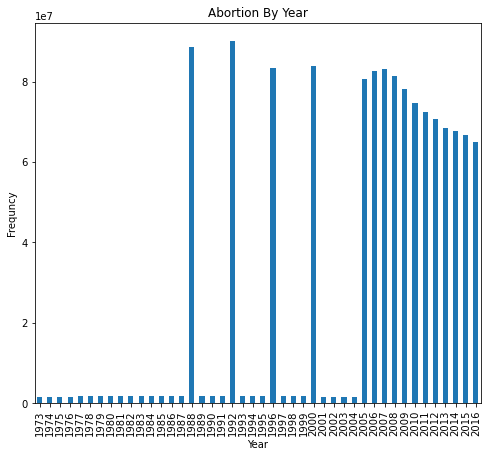

In [154]:


df1 = abortion_by_year.groupby(abortion_by_year['Year'])["TotalAbortions"].sum()
plt.title("Abortion By Year")
plt.ylabel("Frequncy")

df1.plot.bar(figsize = (8,7))

# PMF 
PMF will be anaylized

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#taking the states total abortion

states_totalM_df = state_total_df.copy()

In [53]:
#ordering the pmf by value

states_totalM_df['pmf'] = states_totalM_df['TotalAbortions'] / states_totalM_df['TotalAbortions'].sum()

states_totalM_df = states_totalM_df.sort_values(['pmf']).reset_index(drop=True)

In [54]:
states_totalM_df.head()

,state,TotalAbortions,pmf
0,WY,720,0.000836
1,SD,750,0.000871
2,ND,970,0.001127
3,VT,1140,0.001324
4,AK,1420,0.001650


C:\Users\cast6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


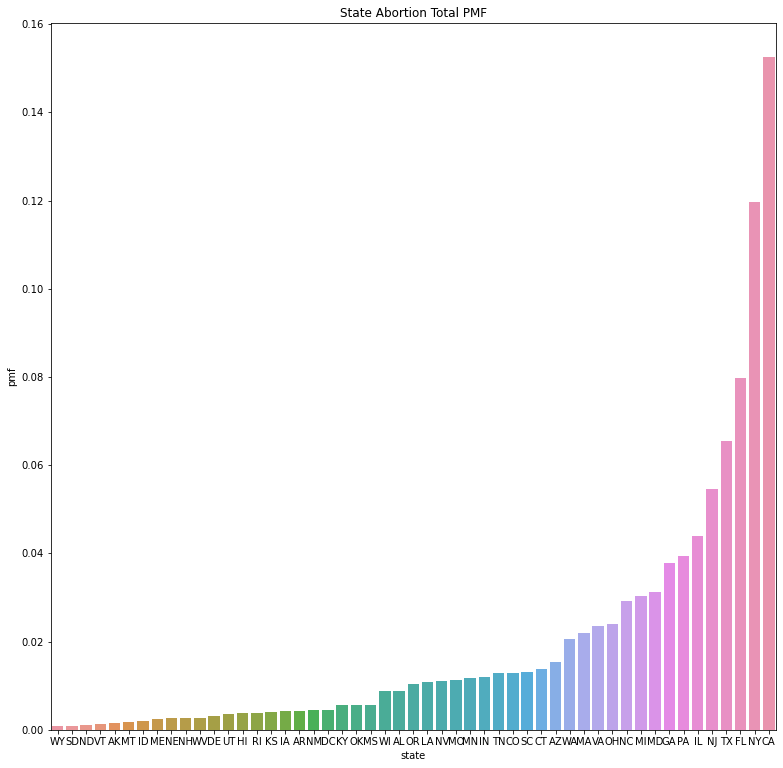

In [155]:
#pmf by abbortion totals

fig , ax = plt.subplots(figsize = (13,13))
plt.title("State Abortion Total PMF")
plt.xlabel("States")
plt.ylabel("Abortion Pmf")
sns.barplot(states_totalM_df['state'],states_totalM_df['pmf'],ax=ax)



plt.show()




In [56]:


age_abortion_pmf = year16_abortionDf.copy()

age_abortion_pmf['pmf'] = age_abortion_pmf['Total_Abortions_Age'] / year16_abortionDf['Total_Abortions_Age'].sum()


age_abortion_pmf.drop(age_abortion_pmf.index[age_abortion_pmf['Age_Range'] == 'Total'], inplace = True)



In [57]:

age_abortion_pmf.head()


,Year,State,Metric,Age_Range,"Events per 1,000 women",Total_Abortions_Age,pmf
15,2016,AL,Abortion Rate,15-17,2.9,2900.0,0.000045
31,2016,AK,Abortion Rate,15-17,4.5,4500.0,0.000069
47,2016,AZ,Abortion Rate,15-17,2.2,2200.0,0.000034
63,2016,AR,Abortion Rate,15-17,2.2,2200.0,0.000034
79,2016,CA,Abortion Rate,15-17,5.3,5300.0,0.000082


C:\Users\cast6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


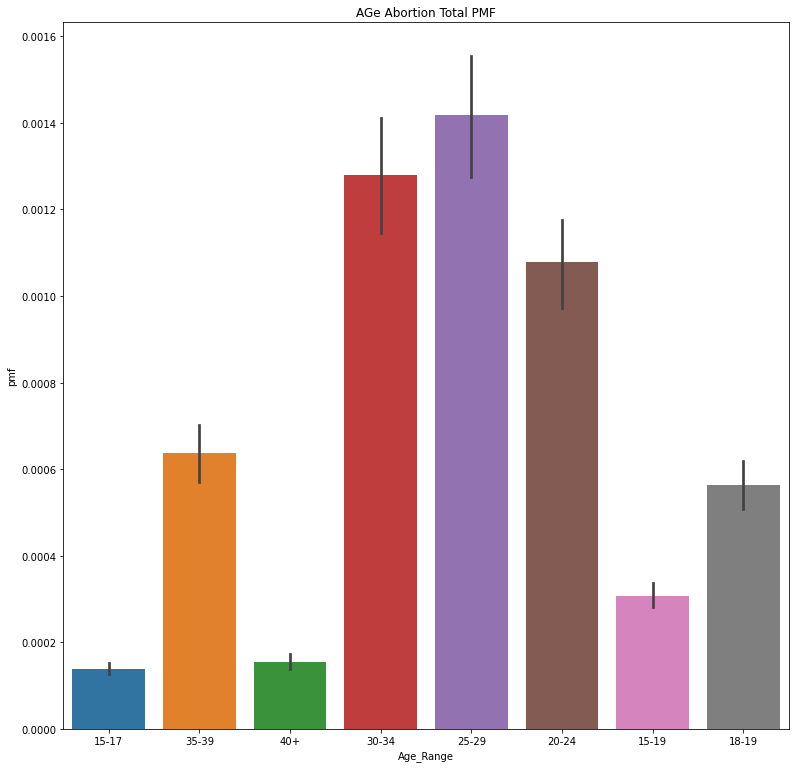

In [156]:
fig , ax = plt.subplots(figsize = (13,13))
plt.title("AGe Abortion Total PMF")
plt.xlabel("States")
plt.ylabel("Abortion Pmf")
sns.barplot(age_abortion_pmf['Age_Range'],age_abortion_pmf['pmf'],ax=ax)


plt.show()

Its safe to say your twice more likely to get an abortion from 20-30. 

In [59]:
#Taking the pmf of political afflication

poli_state_pmf =  poli_state_total_merged.copy()


poli_state_pmf['pmf'] = poli_state_pmf['TotalAbortions'] / poli_state_pmf['TotalAbortions'].sum()
poli_state_pmf.head()



,TotalAbortions,state,called,pmf
AL,7660,Alabama,R,0.008898
AK,1420,Alaska,R,0.001650
AZ,13270,Arizona,D,0.015415
AR,3710,Arkansas,R,0.004310
CA,131380,California,D,0.152617


C:\Users\cast6\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


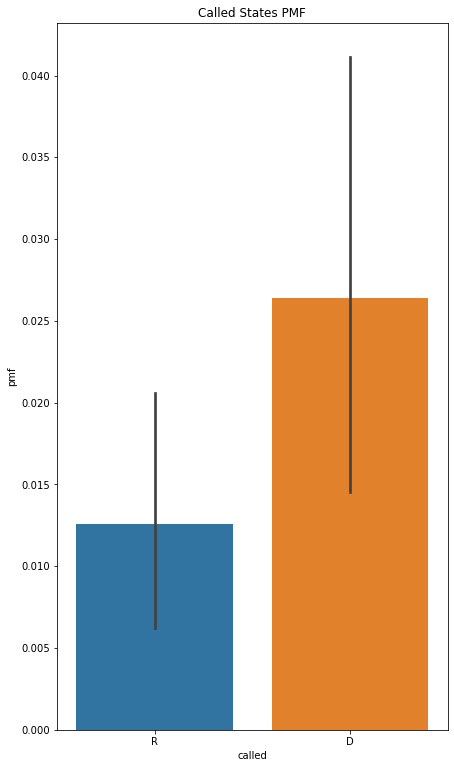

In [60]:
fig , ax = plt.subplots(figsize = (7,13))
plt.title("Called States PMF")
plt.xlabel("States")
plt.ylabel("Abortion Pmf")
sns.barplot(poli_state_pmf['called'],poli_state_pmf['pmf'],ax=ax)


plt.show()

In [61]:
clinic_availablity.head()

,State,No. of abortions,% of all U.S. abortions,"Change in the no. of abortion clinics, 2014-2017 b",% change in the no. of abortion clinics,Number_Of_Clinics,"% of counties without a known abortion provider, 2014"
0,Alabama,6110,0.7,0,0,5,91
1,Alaska,1260,0.1,1,33,4,79
2,Arizona,12400,1.4,-1,-11,8,80
3,Arkansas,3200,0.4,0,0,3,97
4,California,132680,15.4,9,6,161,24


In [62]:
percent_us_abor = clinic_availablity['% of all U.S. abortions']


In [63]:
pdf = percent_us_abor / sum(percent_us_abor)


cdf = np.cumsum(pdf)


Text(0.5, 0, 'Clinic')

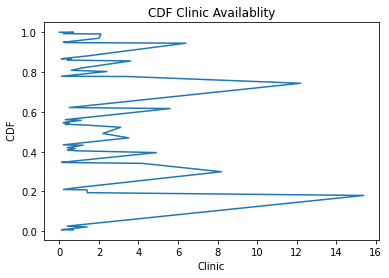

In [159]:
plt.plot( percent_us_abor ,cdf, label="CDF")
plt.title("CDF Clinic Availablity")
plt.ylabel(" CDF")
plt.xlabel("Clinic")

# scatter plot


Text(0, 0.5, 'Total Number of abortions')

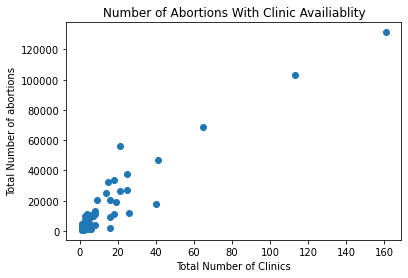

In [65]:
plt.scatter(clinic_availablity.Number_Of_Clinics, poli_state_total_merged.TotalAbortions)
plt.title("Number of Abortions With Clinic Availiablity")
plt.xlabel("Total Number of Clinics")
plt.ylabel("Total Number of abortions")

In [66]:
clinic_availablity.head()

,State,No. of abortions,% of all U.S. abortions,"Change in the no. of abortion clinics, 2014-2017 b",% change in the no. of abortion clinics,Number_Of_Clinics,"% of counties without a known abortion provider, 2014"
0,Alabama,6110,0.7,0,0,5,91
1,Alaska,1260,0.1,1,33,4,79
2,Arizona,12400,1.4,-1,-11,8,80
3,Arkansas,3200,0.4,0,0,3,97
4,California,132680,15.4,9,6,161,24


Text(0.5, 0, 'Unknown Clinics')

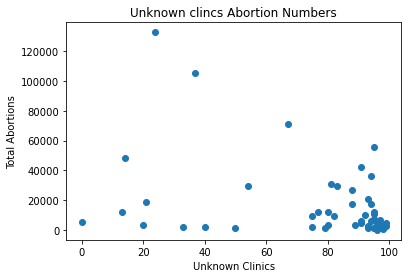

In [67]:
plt.scatter(clinic_availablity['% of counties without a known abortion provider, 2014'],clinic_availablity['No. of abortions'])
plt.title("Unknown clincs Abortion Numbers")
plt.ylabel("Total Abortions")
plt.xlabel("Unknown Clinics")



# Hypothesis Testing

In [88]:

total_clinics_democrat_state.head()
total_clinics_republican_state.head()
poli_state_total_merged.head()

print(sum(poli_state_total_merged.TotalAbortions))

860850


In [120]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import shapiro
from scipy.stats import spearmanr

import numpy as np 

total_abortion_sum =sum(poli_state_total_merged.TotalAbortions)
democrat_mean = np.mean(total_clinics_democrat_state.TotalAbortions)
repblican_mean = np.mean(total_clinics_republican_state.TotalAbortions)


In [111]:
#tset , pval = ttest_1samp(20000,860850)

ttest_rel(democrat_mean,repblican_mean)

Ttest_relResult(statistic=nan, pvalue=nan)

In [114]:
stat , p = shapiro(total_clinics_democrat_state.TotalAbortions)

In [116]:
print(stat, p)


0.6598344445228577 1.566005039421725e-06


# Correlation between clincs and abortions

In [118]:
clinic_availablity.head()

,State,No. of abortions,% of all U.S. abortions,"Change in the no. of abortion clinics, 2014-2017 b",% change in the no. of abortion clinics,Number_Of_Clinics,"% of counties without a known abortion provider, 2014"
0,Alabama,6110,0.7,0,0,5,91
1,Alaska,1260,0.1,1,33,4,79
2,Arizona,12400,1.4,-1,-11,8,80
3,Arkansas,3200,0.4,0,0,3,97
4,California,132680,15.4,9,6,161,24


In [128]:
#null hypothesis: Clinic availablity does not mean more abortions

#alternative: More clinic availablity means more abortions.


number_of_abortion = clinic_availablity['No. of abortions']
number_of_clinics = clinic_availablity['Number_Of_Clinics']


stat , p = spearmanr(number_of_abortion,number_of_clinics )

print(stat , p)

if p > 0.05:
    print("Does not support a strong enough claim that it effects the population.")
else:
    print(p)
    print("Has enough evidence to support claim")

    #shows and effect is large


0.8329054398987282 3.466203958646422e-14
3.466203958646422e-14
Has enough evidence to support claim


In [130]:
correlation = number_of_abortion.corr(number_of_clinics)
correlation

0.9394296452703171

In [ ]:
sns.heatmap()

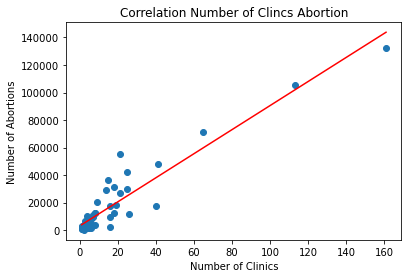

In [136]:
plt.title("Correlation Number of Clincs Abortion")
plt.ylabel("Number of Abortions")
plt.xlabel("Number of Clinics")
plt.scatter(number_of_clinics,number_of_abortion)
plt.plot(np.unique(number_of_clinics) , np.poly1d(np.polyfit(number_of_clinics, number_of_abortion, 1))
        (np.unique(number_of_clinics)), color='red')

<AxesSubplot:>

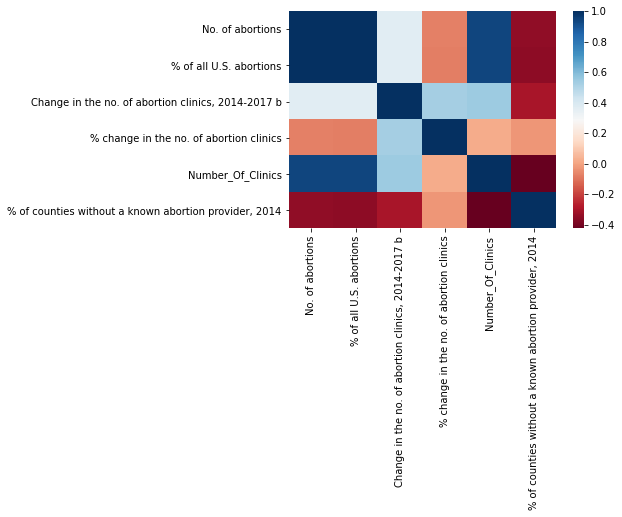

In [137]:
corr = clinic_availablity.corr()

sns.heatmap(corr,xticklabels = corr.columns , yticklabels=corr.columns, cmap = "RdBu")